# Image Captioning using Deep Learning: Assignment-2

*  In this assignment, we will build a classifier for MNIST from using [PyTorch](https://pytorch.org/docs/stable/index.html). 

*   No limitations on your model this time, just don't use CNNs now, that's up next week.

**Feel free to redefine any pre-written cells below, just make sure to properly explain your work in Markdown and don't change the dataset**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Also remember to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

## Load *Dataset*
**DON'T CHANGE THIS CODE**.

In [22]:
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()                                                                       
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()                                                   
                       ]))

In [23]:
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(train.data.float().mean(), train.data.float().std()))

Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344


In [24]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

# Your Code from here...

In [25]:
# load the data set
from torch.utils.data import DataLoader
X = DataLoader(train, batch_size=60, shuffle=True)
y = DataLoader(test, batch_size=60, shuffle=True)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract data and labels
X_train = train.data
y_train = train.targets 
X_test = test.data
y_test = test.targets

# Convert data to float and normalize it
X_train = X_train.float() / 255
X_test = X_test.float() / 255


In [26]:
X_train[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

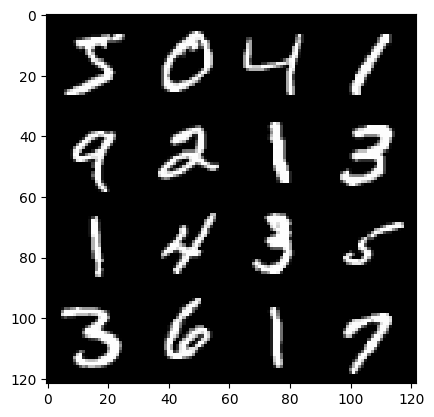

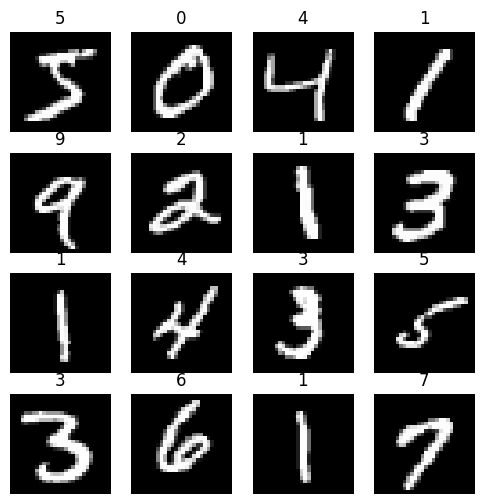

In [27]:
# display a 4x4 grid
from torchvision.utils import make_grid
# Select the first 16 images from the dataset
images = [train[i][0] for i in range(16)]
labels = [train[i][1] for i in range(16)]
# Create a grid of images using make_grid
grid = make_grid(images, nrow=4)
# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.show()

# choose 16 images randomly, display the images as well as corresponding labels
# Select 16 images from the dataset
images = train.data[:16]
# Create a figure with a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(6, 6))

# Plot the images in the subplots
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(labels[i])
    ax.axis('off')

# Display the figure
plt.show()


## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [```nn.ReLU```](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- [```nn.BatchNorm1d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)


In [28]:
# define a child class of nn.Module for your model
# specify the architecture here itself

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x


## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

In [29]:
def train(model, optimizer, criterion, train_loader, display_step=None):
    for epoch in range(10):
        for i, (X_train, y_train) in enumerate(train_loader):
            optimizer.zero_grad()
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            loss.backward()
            optimizer.step()
    
    

## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [30]:
def predict(model, X_test):
    # Convert the input data to a PyTorch tensor
    X_test = X_test.float()
    # Normalize the data
    X_test = X_test/255
    # Perform the forward pass
    with torch.no_grad():
        output = model(X_test)
    # Convert the output data to a NumPy array
    output = output.numpy()
    return output


In [31]:
def accuracy(pred, labels):
    # Convert predictions to numpy array
    predictions = pred.numpy()
    labels = labels.numpy()
    # Get the index of the max value for each sample
    predicted_labels = np.argmax(predictions, axis=1)
    # Calculate the number of correct predictions
    correct = (predicted_labels == labels).sum()
    # Calculate the accuracy
    acc = correct / len(labels)
    return acc

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [32]:
import torch.optim as optim
model = Classifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train(model, optimizer, criterion, X, display_step=None)

In [37]:
predict(model, X_train)

array([[-1.5065459 , -1.725176  , -0.8289144 , ..., -0.92072487,
        -0.741888  , -0.5487433 ],
       [-1.426696  , -1.7557083 , -0.8295654 , ..., -0.9516959 ,
        -0.7833052 , -0.59273046],
       [-1.5306877 , -1.7815287 , -0.8347748 , ..., -0.9959049 ,
        -0.8271306 , -0.5991159 ],
       ...,
       [-1.5537276 , -1.7752186 , -0.86749566, ..., -0.9415593 ,
        -0.7496095 , -0.5392274 ],
       [-1.4710901 , -1.7580303 , -0.81689847, ..., -1.0146581 ,
        -0.81077933, -0.6206316 ],
       [-1.5146832 , -1.7942086 , -0.87454534, ..., -0.99198365,
        -0.7582403 , -0.57070494]], dtype=float32)

## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [38]:
predict(model, X_test)

array([[-1.5103979 , -1.7595439 , -0.830103  , ..., -0.88065565,
        -0.8024066 , -0.58177084],
       [-1.443641  , -1.6956967 , -0.8208129 , ..., -1.1026962 ,
        -0.6781055 , -0.59629214],
       [-1.5338248 , -1.7513714 , -0.86264485, ..., -1.036011  ,
        -0.7345678 , -0.5776885 ],
       ...,
       [-1.5463371 , -1.814304  , -0.86346763, ..., -1.0069824 ,
        -0.8004883 , -0.5957715 ],
       [-1.5454305 , -1.7962514 , -0.8971756 , ..., -1.023046  ,
        -0.7338119 , -0.5803436 ],
       [-1.4263674 , -1.749368  , -0.8038987 , ..., -1.0940255 ,
        -0.7845331 , -0.6384473 ]], dtype=float32)

## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Other than this, save the trained model in a file named ```ass_2.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py``` class file and the ```ass_2.pt``` model-weights file to the repository.

In [39]:
torch.save(model, "ass_2.pt")

In [ ]:
#from google.colab import files
#torch.save(final_model, 'ass_2.pt')
#files.download('ass_2.pt') # download the file from the Colab session for submission

Check if it got saved right!

In [16]:
# load the model, use predict function
